# KAMIKAZE Pool Report

## Table of Contents

1. [Assignees](#1-Assignees)
    * [Since Creation](#1.1-Since-creation)
    * [Per Week](#1.2-Per-week)
2. [Tag Related](#2-Tag-related)
    * [Since creation](#2.1-Since-creation)
    * [Top 5 tags since creation](#2.2-Top-5-tags-since-creation)

In [94]:
from urllib.request import Request, urlopen
import json
import pandas as pd
import itertools
from pandas.io.json import json_normalize

In [2]:
COOKIE = 'lang_pref=en; _ga=GA1.2.1416690212.1542720478; _gaexp=GAX1.2.in5y_1ubT--YS9vbKucGEQ.17934.0!JF2DnSL3QxqJ9mYHYEsksA.17948.0; asana_orig_attr=%7B%22source%22%3A%22%22%2C%22query_string%22%3A%22%22%2C%22exit_page%22%3A%22%2F%22%2C%22landing_page%22%3A%22%2F%22%2C%22useragent%22%3A%22Mozilla%2F5.0%20(X11%3B%20Linux%20x86_64)%20AppleWebKit%2F537.36%20(KHTML%2C%20like%20Gecko)%20Chrome%2F69.0.3497.100%20Safari%2F537.36%22%2C%22timestamp%22%3A1542720479%2C%22convNum%22%3A184077389%7D; _mhbktsv=dbm; _gcl_au=1.1.705567108.1542720481; last_domain=2653227806782; p=0; optimizelyEndUserId=oeu1543865286842r0.936769239108139; optimizelySegments=%7B%22175086470%22%3A%22search%22%2C%22175122859%22%3A%22gc%22%2C%22175132201%22%3A%22false%22%2C%226118411233%22%3A%22none%22%7D; optimizelyBuckets=%7B%7D; asana_experiments={}; NaN_hash=a9c129b1PYDVOSJX1543865291117; xsrf_token=34fdc25ae5e8a5fcd227e080aa8e5cf7%3A1543930315132; user=421257675580403; auth_token=876ecb3d846735afda24e29f36075ecd; ticket=585a50e7019cdb6decb20b91f33aa790ac1a76a6a461fee40c6ac00d54f55e36; is_logged_in=true; luna_db_server_query_string=userId=421257675580403&shardId=2653227806782; _gid=GA1.2.1044550046.1544121711; server=prod-ws121.ec2|XArAH'
TOKEN = 'Bearer 0/2e807d8f4b098b3f1e1d6bd84a5cf1eb'

In [3]:
def request_json(url):
    request = Request(url)
    request.add_header('Content-Type', 'application/json')
    request.add_header('Authorization', TOKEN)

    data = json.loads(urlopen(request).read().decode('utf-8'))
    return data

In [4]:
def get_assignees(base_dataframe):
    assignee_list = list(json.loads(base_dataframe.assignee.to_json()).values())
    assignee_df = pd.read_json(json.dumps(list(filter(None.__ne__, assignee_list))))
    return assignee_df

In [5]:
POOL = '680563298779433'

In [7]:
data = request_json('https://app.asana.com/api/1.0/projects/{}/tasks?opt_expand=(this%7Ctags%2B)'.format(POOL))

In [8]:
data.get('data')[0]

{'assignee': None,
 'assignee_status': 'upcoming',
 'completed': False,
 'completed_at': None,
 'created_at': '2018-07-02T21:03:24.112Z',
 'custom_fields': [{'enabled': True,
   'gid': '207648931279186',
   'id': 207648931279186,
   'name': 'Estimate',
   'number_value': None,
   'precision': 0,
   'resource_subtype': 'number',
   'resource_type': 'custom_field',
   'type': 'number'},
  {'enabled': True,
   'gid': '326509860716922',
   'id': 326509860716922,
   'name': 'Time spent',
   'number_value': None,
   'precision': 1,
   'resource_subtype': 'number',
   'resource_type': 'custom_field',
   'type': 'number'},
  {'enabled': True,
   'enum_options': [{'color': 'pink',
     'enabled': True,
     'gid': '839796772462332',
     'id': 839796772462332,
     'name': 'Backlog',
     'resource_type': 'enum_option'},
    {'color': 'cool-gray',
     'enabled': True,
     'gid': '833194452969145',
     'id': 833194452969145,
     'name': 'Baixa',
     'resource_type': 'enum_option'},
    {'co

In [9]:
df = pd.read_json(json.dumps(data.get('data')))
df.head()

,assignee,assignee_status,completed,completed_at,created_at,custom_fields,due_at,due_on,followers,gid,...,num_hearts,num_likes,parent,projects,resource_subtype,resource_type,start_on,subtasks,tags,workspace
0,None,upcoming,False,NaT,2018-07-02 21:03:24.112,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",730452261753984,...,0,0,None,"[{'id': 680563298779433, 'name': 'FRONT KAMIKA...",section,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
1,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,True,2018-10-19 19:22:16.621,2018-10-17 12:37:55.024,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",820637064816196,...,0,0,"{'id': 684409696069679, 'name': '[apoioentrega...","[{'id': 680563298779433, 'name': 'FRONT KAMIKA...",default_task,task,None,"[{'hearts': [], 'hearted': False, 'notes': 'So...","[{'id': 22125825955790, 'name': 'INT', 'gid': ...","{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
2,"{'id': 662420552271652, 'name': 'Jhonatan Tomi...",inbox,True,2018-10-26 22:25:27.792,2018-10-23 14:06:41.498,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",878362291588530,...,0,0,"{'id': 684409696069679, 'name': '[apoioentrega...","[{'id': 680563298779433, 'name': 'FRONT KAMIKA...",default_task,task,None,[],"[{'id': 22125825955790, 'name': 'INT', 'gid': ...","{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
3,"{'id': 633968712880933, 'name': 'Caio Amaral',...",inbox,True,2018-12-03 18:59:25.032,2018-11-29 19:36:45.448,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",928216055716059,...,0,0,"{'id': 898807941571417, 'name': '[drogaraia] P...","[{'id': 680563298779433, 'name': 'FRONT KAMIKA...",default_task,task,None,[],"[{'id': 12438359298694, 'name': 'CC:Mail', 'gi...","{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
4,"{'id': 517130048139702, 'name': 'Felipe Bremer...",inbox,True,2018-10-25 20:37:43.776,2018-10-25 18:35:11.589,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'id': 517130048139702, 'name': 'Felipe Breme...",883197588138604,...,0,0,"{'id': 684409696069679, 'name': '[apoioentrega...","[{'id': 680563298779433, 'name': 'FRONT KAMIKA...",default_task,task,None,[],"[{'id': 22125825955790, 'name': 'INT', 'gid': ...","{'id': 2653227806782, 'name': 'Chaordic', 'gid..."


In [10]:
df.describe()

,gid,id,num_hearts,num_likes
count,5.250000e+02,5.250000e+02,525.000000,525.000000
mean,8.323286e+14,8.323286e+14,0.005714,0.005714
std,8.792325e+13,8.792325e+13,0.075448,0.075448
min,5.364914e+14,5.364914e+14,0.000000,0.000000
25%,7.744101e+14,7.744101e+14,0.000000,0.000000
50%,8.503289e+14,8.503289e+14,0.000000,0.000000
75%,9.085784e+14,9.085784e+14,0.000000,0.000000
max,9.423951e+14,9.423951e+14,1.000000,1.000000


In [11]:
week_completed_df = df[(df['completed_at'] > '2018-12-01') & (df['completed_at'] < '2019-08-01')]

In [12]:
assignee_df = get_assignees(df)
assignee_df.head()

,gid,id,name,resource_type
0,15423278950548,15423278950548,Karen Costa,user
1,547404614034527,547404614034527,Felipe Becker,user
2,662420552271652,662420552271652,Jhonatan Tomimatsu,user
3,633968712880933,633968712880933,Caio Amaral,user
4,15423278950548,15423278950548,Karen Costa,user


# 1 - Assignees

## 1.1 Since creation

In [13]:
assignee_df['name'].value_counts()

Jhonatan Tomimatsu                 84
Caio Amaral                        57
Luan Araldi                        53
Denise Giubilei                    44
Eduardo                            39
Karen Costa                        34
Anderson Silva                     30
Gleice Souza                       26
Felipe Becker                      18
Guilherme Pries                    14
Carlos Eduardo Libardo              9
William Silva Godoy                 6
raphael.ribeiro                     6
Cássio Couto                        5
Weslley Azevedo                     5
Heron Monteiro                      3
Ivanildo de Castro                  3
Tácio Medeiros                      3
Felipe Bremer de Moraes             2
Tyller Jor'El                       2
giancarlo.freitas                   2
Marcos Siqueira Junior              2
Gabriel Silva                       2
Victor Oliveira                     2
juliana                             2
Cássio Böck                         2
Marta       

In [14]:
assignee_df['name'].value_counts().plot(kind='barh', figsize=(10, 15))

## 1.2 Per week

In [15]:
assignees_week_completed_df = get_assignees(week_completed_df)
assignees_week_completed_df.head()

,gid,id,name,resource_type
0,633968712880933,633968712880933,Caio Amaral,user
1,771731756164271,771731756164271,Anderson Silva,user
2,354706923192815,354706923192815,Denise Giubilei,user
3,382166779424552,382166779424552,Gleice Souza,user
4,771731756164271,771731756164271,Anderson Silva,user


In [16]:
assignees_week_completed_df['name'].value_counts()

Luan Araldi           9
Denise Giubilei       7
Anderson Silva        7
Caio Amaral           7
Gleice Souza          4
Jhonatan Tomimatsu    4
Eduardo               3
Karen Costa           2
Gabriel Silva         1
Guilherme Pries       1
Name: name, dtype: int64

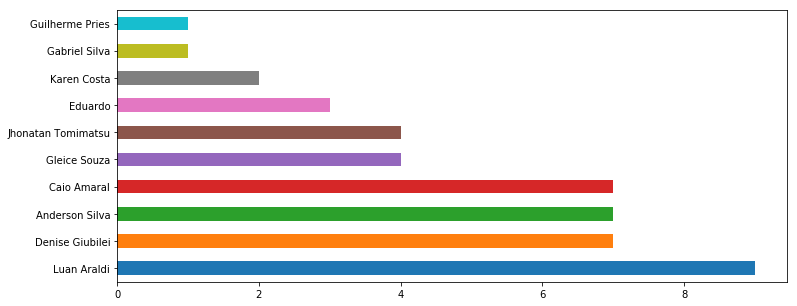

In [17]:
assignees_week_completed_df['name'].value_counts().plot(kind='barh', figsize=(12, 5))

# 2 Tag Related

In [18]:
def get_tags(base_dataframe):
    tags_list = list(json.loads(base_dataframe.tags.to_json()).values())
    tags_df = pd.read_json(json.dumps(list(filter(None.__ne__, list(itertools.chain(*tags_list))))))
    return tags_df

## 2.1 Since creation

In [19]:
tags_df = get_tags(df)
tags_df['name'].value_counts().iloc[1:]

rework                     134
CC:Busca                   125
CC:OnSite                  125
CC:Base                    121
CC:Mail                     81
CC:API                       7
VTEX                         6
ATD                          5
CC:ColabINT                  4
Engage: NotProblem           4
DS: P1                       3
DS: Sprint 10 (H2-2018)      3
DS: Unplanned                3
rework_Cliente               2
CC:Banners                   2
DS: Mail                     2
atraso                       1
CC:Problem                   1
DS: Sprint 4 (H2-2018)       1
CC:OutOfScope                1
DS: Vitrines                 1
DS: P2                       1
CC:Percycle                  1
Engage: P0                   1
Name: name, dtype: int64

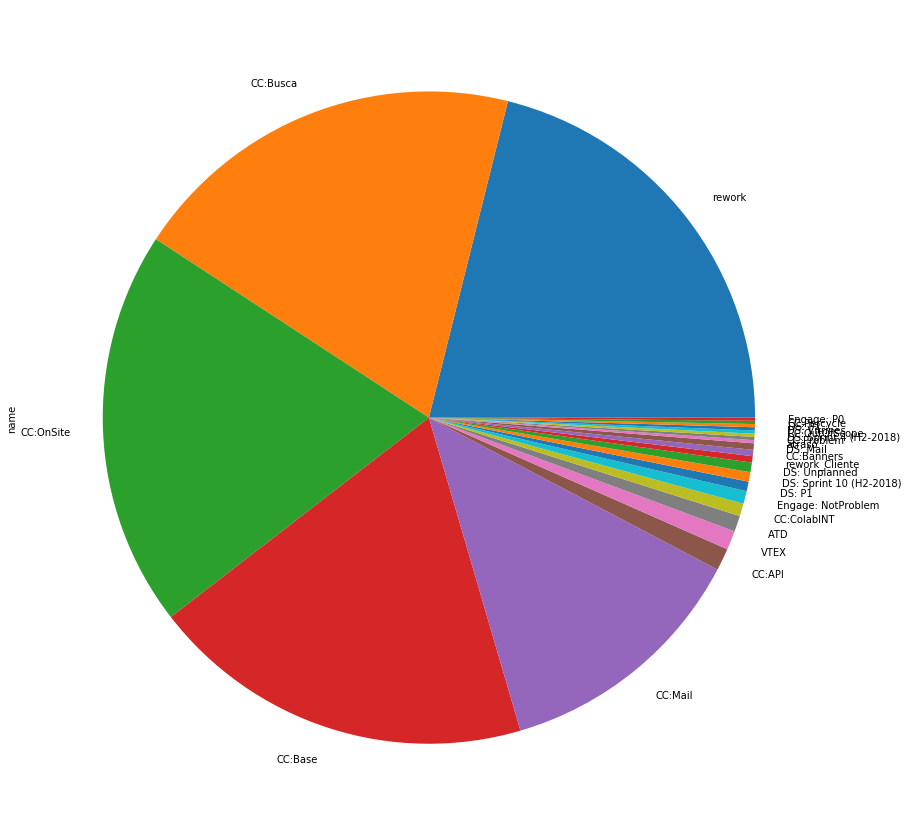

In [20]:
tags_df['name'].value_counts().iloc[1:].plot(kind='pie', figsize=(15, 15))

## 2.2 Top 5 tags since creation

In [21]:
tags_df['name'].value_counts().iloc[1:].nlargest(6)

rework       134
CC:Busca     125
CC:OnSite    125
CC:Base      121
CC:Mail       81
CC:API         7
Name: name, dtype: int64

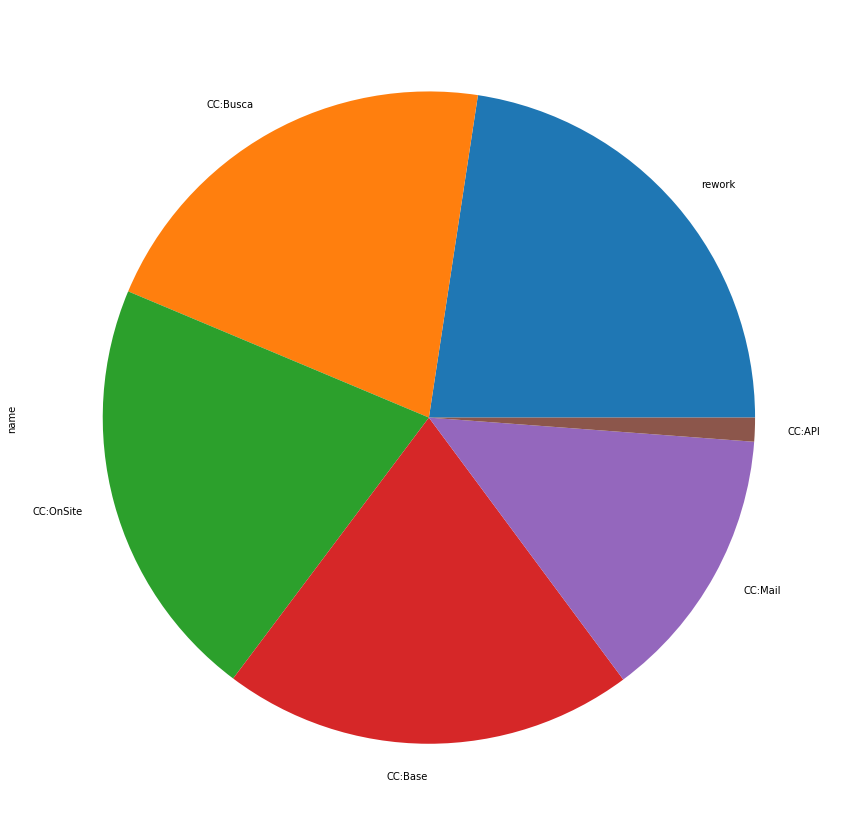

In [22]:
tags_df['name'].value_counts().iloc[1:].nlargest(6).plot(kind='pie', figsize=(15, 15))

# 3 Subtasks

In [23]:
df.head()
def get_subtasks_by_rework_tag(base_dataframe):
    subtask_list = [subtask for subtask in base_dataframe.subtasks if len(subtask)]
    subtask_list = list(itertools.chain(*subtask_list))

    return [subtask for subtask in subtask_list if len(subtask.get('tags', []))]

In [24]:
subtask_list_df = pd.DataFrame(get_subtasks_by_rework_tag(df))
subtasks_with_rework = get_tags(subtask_list_df)
subtasks_with_rework['name'].value_counts()

 rework_Codificação            160
rework_Cliente                  83
INT                             22
rework_Não_se_aplica            21
CC:Base                         16
rework_Produto                  11
rework_Processo                  9
rework_Browser                   6
rework_Pool_externo              6
CC:OnSite                        5
rework_Sugestão                  4
Bug                              3
Onsite                           3
rework                           3
Vitrines: 2018-H1-Sprint 12      2
Vitrines: unplanned              2
onsite-js                        1
rework_Homologação               1
onsite-boss                      1
CC:Busca                         1
Name: name, dtype: int64

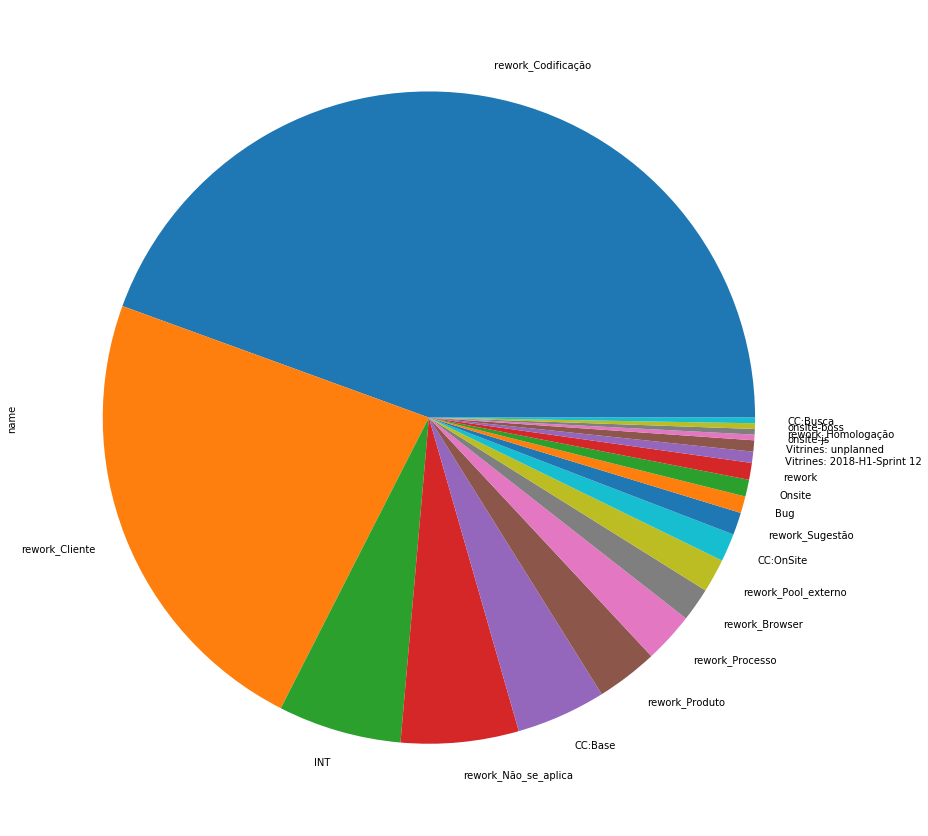

In [25]:
subtasks_with_rework['name'].value_counts().plot(kind='pie', figsize=(15, 15))

In [26]:
def get_projects(base_dataframe):
    import re
    
    projects_list = list(json.loads(base_dataframe.parent.to_json()).values())
    projects_list = list(filter(None.__ne__, list(itertools.chain(projects_list))))
    
    def extract_client (item):
        try:
            return re.compile('\[.*\]').match(item).group().replace('[', '').replace(']', '')
        except:
            return item
    
    projects_list = [{ 'name': extract_client(project['name'])} for project in projects_list]
    return projects_list

In [27]:
get_projects(df)

[{'name': 'arredo-uy'},
 {'name': 'outletespacociahering'},
 {'name': 'apoioentrega'},
 {'name': 'outletespacociahering'},
 {'name': 'drogariaspacheco'},
 {'name': 'natura-v6'},
 {'name': 'natura-v6'},
 {'name': 'natura-v6'},
 {'name': 'arredo-ar'},
 {'name': 'arredo-ar'},
 {'name': 'arredo-uy'},
 {'name': 'dia'},
 {'name': 'arredo-ar'},
 {'name': 'comprafoodservice'},
 {'name': 'apoioentrega'},
 {'name': 'drogaraia'},
 {'name': 'apoioentrega'},
 {'name': 'apoioentrega'},
 {'name': 'heringkids'},
 {'name': 'arredo-uy'},
 {'name': 'zoom'},
 {'name': 'natura-v6'},
 {'name': 'arredo-ar'},
 {'name': 'drogariaspacheco'},
 {'name': 'arredo-uy'},
 {'name': 'heringkids'},
 {'name': 'natura-v6'},
 {'name': 'drogariasaopaulo'},
 {'name': 'apoioentrega'},
 {'name': 'arredo-ar'},
 {'name': 'zoom'},
 {'name': 'outletespacociahering'},
 {'name': 'apoioentrega'},
 {'name': 'apoioentrega'},
 {'name': 'natura-v6'},
 {'name': 'drogaraia'},
 {'name': 'apoioentregaVTEX'},
 {'name': 'heringkids'},
 {'name'

In [28]:
parents_df = pd.DataFrame(get_projects(df))
parents_df.describe()

,name
count,479
unique,38
top,apoioentrega
freq,102


In [34]:
parents_df['name'].value_counts(ascending=True)

Q1.2018 e Q2.2018             1
MagazineLuiza                 1
OffPremium-vtex               1
magazineluiza                 1
SuperNossoEmCasa              1
comprafoodservice-v6          1
comprafoodserviceBacklog      1
comprafoodserviceDEV          1
centauro-v5                   2
tiendasjumbofood              2
Arredoar                      2
arredo-arVTEX                 2
apoioentregaBACKLOG           3
mmplace                       3
bluegardenia                  3
heringkids                    4
drogariasaopauloVTEX          5
dzarm                         5
pucwebstore                   5
hering-v5                     5
mmplaceVTEX                   6
tokstok                       6
drogariaspachecoVTEX          7
arredo-uyVTEX                 7
zoom                         10
pneustore                    11
dia                          11
drogariaspacheco             12
drogariasaopaulo             12
apoioentregaVTEX             12
drogaraia                    20
drogasil

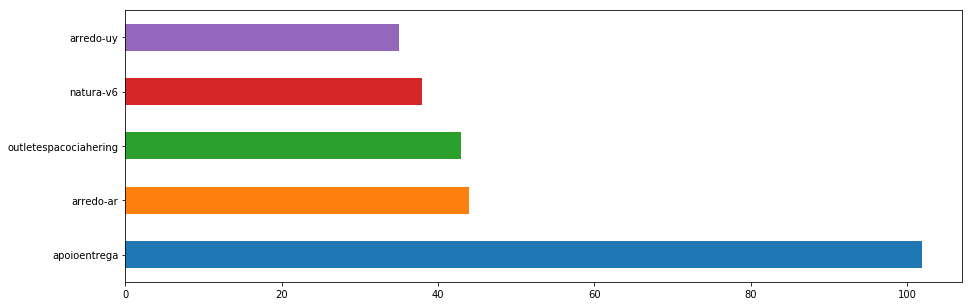

In [38]:
parents_df['name'].value_counts(ascending=True).nlargest(5).plot(kind='barh', figsize=(15, 5))

In [264]:
full_data_df = json_normalize(data=data.get('data'), sep='_')

full_data_df = json_normalize(data=data.get('data'), 
                              record_path=['custom_fields'], 
                              sep='_', 
                              meta=list(full_data_df.keys()), 
                              meta_prefix='',
                              record_prefix='custom_field_',
                              errors='ignore')

full_data_df = json_normalize(data=json.loads(full_data_df.to_json(orient='records')),
                              record_path=['followers'],
                              sep='_', 
                              meta=list(full_data_df.keys()), 
                              meta_prefix='',
                              record_prefix='follower_',
                              errors='ignore')

full_data_df = json_normalize(data=json.loads(full_data_df.to_json(orient='records')),
                              record_path=['projects'],
                              sep='_', 
                              meta=list(full_data_df.keys()), 
                              meta_prefix='',
                              record_prefix='project_',
                              errors='ignore')

full_data_df = json_normalize(data=json.loads(full_data_df.to_json(orient='records')),
                              record_path=['subtasks'],
                              sep='_', 
                              meta=list(full_data_df.keys()), 
                              meta_prefix='',
                              record_prefix='subtask_',
                              errors='ignore')

full_data_df = full_data_df.drop(['followers', 'custom_fields', 'projects', 'subtasks'], axis=1)

In [265]:
full_data_df.filter(regex=('subtask*'))

,subtask_assignee,subtask_assignee_status,subtask_completed,subtask_completed_at,subtask_created_at,subtask_custom_fields,subtask_due_at,subtask_due_on,subtask_followers,subtask_gid,...,subtask_num_hearts,subtask_num_likes,subtask_parent,subtask_projects,subtask_resource_subtype,subtask_resource_type,subtask_start_on,subtask_subtasks,subtask_tags,subtask_workspace
0,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,True,2018-10-18T19:09:23.318Z,2018-10-18T17:19:17.647Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602726,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
1,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,True,2018-10-18T19:09:23.937Z,2018-10-18T17:19:31.248Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602727,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
2,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,True,2018-10-18T19:09:23.937Z,2018-10-18T17:19:35.824Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602728,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
3,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,False,None,2018-10-18T17:19:40.759Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602729,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
4,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,True,2018-10-18T19:09:23.318Z,2018-10-18T17:19:17.647Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602726,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
5,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,True,2018-10-18T19:09:23.937Z,2018-10-18T17:19:31.248Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602727,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
6,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,True,2018-10-18T19:09:23.937Z,2018-10-18T17:19:35.824Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602728,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
7,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,False,None,2018-10-18T17:19:40.759Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602729,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
8,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,True,2018-10-18T19:09:23.318Z,2018-10-18T17:19:17.647Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602726,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."
9,"{'id': 421257675580403, 'name': 'Luan Araldi',...",inbox,True,2018-10-18T19:09:23.937Z,2018-10-18T17:19:31.248Z,[],None,None,"[{'id': 633968712880933, 'name': 'Caio Amaral'...",873065027602727,...,0,0,"{'id': 820637064816196, 'name': '[P0][apoioent...",[],default_task,task,None,[],[],"{'id': 2653227806782, 'name': 'Chaordic', 'gid..."


In [252]:
len(full_data_df)

6991

In [88]:
df[(df.parent != None) & ('apoioentrega' in dict(list(df.parent)))['name']]

TypeError: cannot convert dictionary update sequence element #0 to a sequence